In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Initial DF

In [2]:
df_cars = pd.read_csv("/home/pau/datasets/car_price_linear_reg.csv")

In [3]:
df_cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df_cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

/tmp/ipykernel_257/15431140.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cars.corr())


<Axes: >

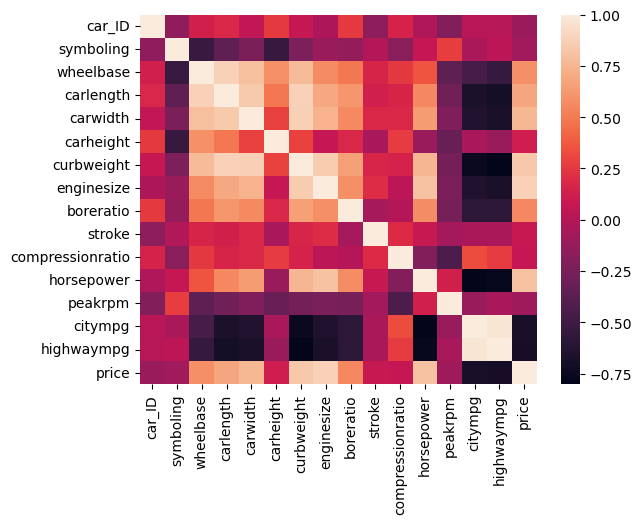

In [6]:
sns.heatmap(df_cars.corr())

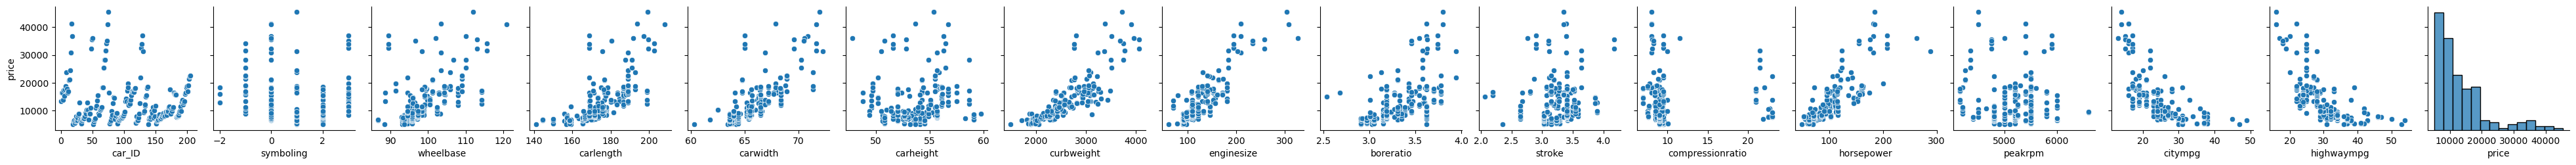

In [7]:
sns.pairplot(df_cars, y_vars="price")

## Clean DF

In [35]:
df = df_cars.select_dtypes(include=['number'])
df = df.drop(["citympg","highwaympg", "car_ID", "symboling", "carheight", "stroke", "compressionratio","peakrpm"], axis=1)

In [36]:
df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,16845.0
201,109.1,188.8,68.8,3049,141,3.78,160,19045.0
202,109.1,188.8,68.9,3012,173,3.58,134,21485.0
203,109.1,188.8,68.9,3217,145,3.01,106,22470.0


<Axes: >

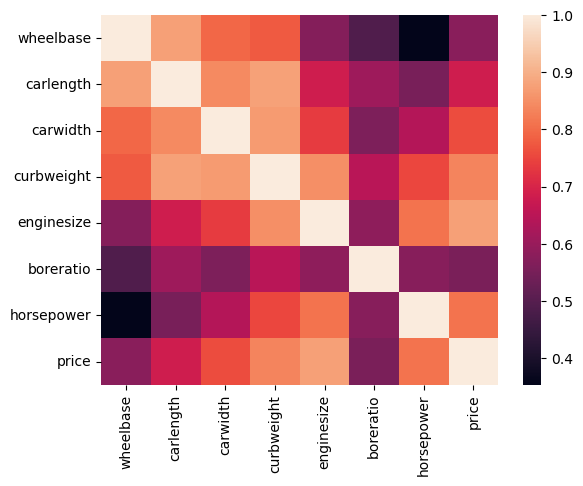

In [37]:
sns.heatmap(df.corr())

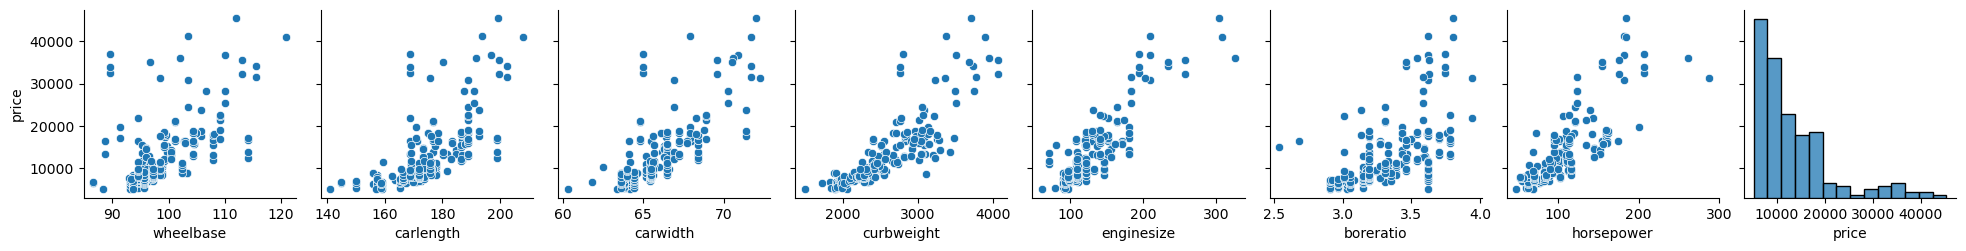

In [38]:
sns.pairplot(df, y_vars="price")

## Training

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
X = df.drop(["price"], axis=1)
y = df[["price"]]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

In [42]:
linear_model = LinearRegression()

In [43]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [44]:
prediction = linear_model.predict(X_test)

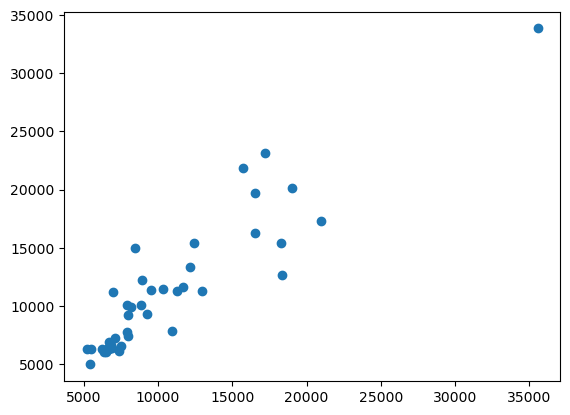

In [45]:
plt.scatter(y_test, prediction)

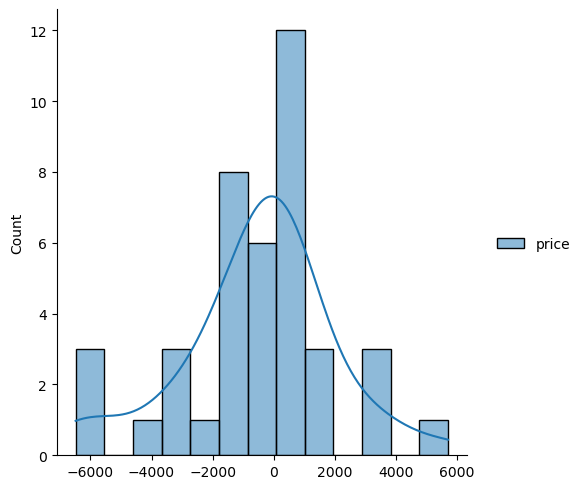

In [46]:
sns.displot((y_test-prediction), kde=True)

### Metrics

In [47]:
from sklearn import metrics

In [50]:
print("MAE: ", metrics.mean_absolute_error(y_test, prediction))
print("MSE: ", metrics.mean_squared_error(y_test, prediction))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print("R^: ", metrics.r2_score(y_test, prediction))

MAE:  1726.6868075286563
MSE:  6236356.767748456
RMSE:  2497.269862819887
R^:  0.8138644354021155
